In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
train_data = pd.read_csv("./train.csv")
print(train_data.shape)
train_data.columns

(8693, 14)


Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [3]:
# sns.histplot(train_data.HomePlanet)
#There are 3 home planets. Earth has a clear majority. Can use ordinal encoding to Earth - 1 , Europa - 2 , Mars - 3 in descending order.
#Try differnce in performance between oneHot and ordinal

In [4]:
a = train_data.CryoSleep.sum()
b = len(train_data.CryoSleep)
a,b,a/b
# train_data.CryoSleep.isnull().sum()
#Has 217 Null values and about 35% people are in cryosleep

(3037, 8693, 0.3493615552743587)

{'B': 779, 'F': 2794, 'A': 256, 'G': 2559, 'n': 199, 'E': 876, 'D': 478, 'C': 747, 'T': 5}


<Axes: >

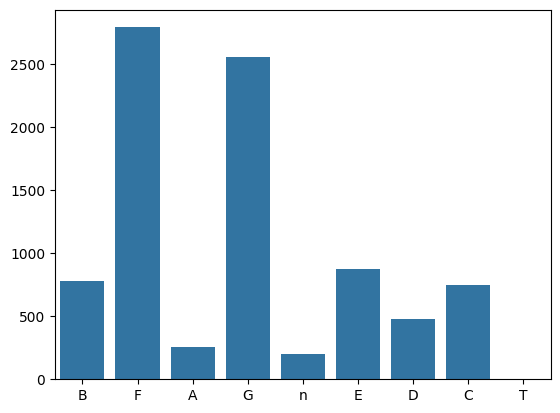

In [10]:
train_data.Cabin.unique().shape,train_data.Cabin.shape
#Cabin has too many unique values.
train_data.Cabin.head()
cabins = train_data.Cabin
freq = {}
for i in cabins:
    i = str(i)
    cabin = i[0]
    if cabin in freq:
        freq[cabin] +=1
    else:
        freq[cabin] = 1
print(freq)
#199 unknown values ('n') 
sns.barplot(freq)
#Use oneHotEncoding

In [6]:
train_data.Destination.unique()
# sns.histplot(train_data.Destination)
#Majority goes to trappist. Few null values.
# print("NULL VALUES" ,train_data.Destination.isnull().sum())
#Use OneHot and set ignore NULL

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

28.82793046746535

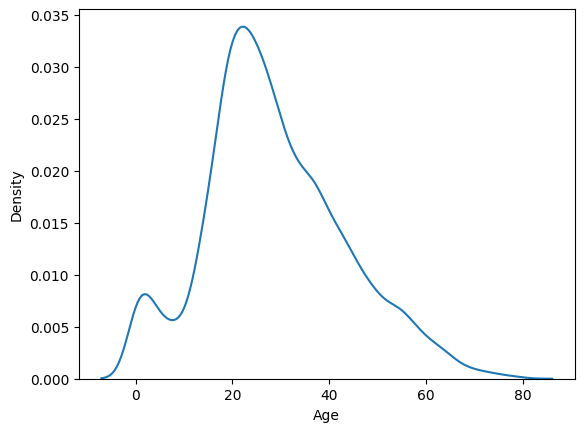

In [7]:
sns.kdeplot(data = train_data.Age )
train_data.Age.isnull().sum()
#just scale it and fill in the null values with the average 28.8379
train_data.Age.mean()

In [8]:
train_data.VIP.isnull().sum()
#Just assume null is 0 as majority are 0

203

In [9]:
train_data.RoomService.isnull().sum()
train_data.FoodCourt.isnull().sum()
#Replece null with mode of the data for foodcourt,roomservice,shoppingmall,vrdeck,spa
train_data.FoodCourt.mode()
train_data.RoomService.mode()

0    0.0
Name: RoomService, dtype: float64